# Notebook for all 2020 campaign data

## Import Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = os.getcwd()
print(DIR)



df = pd.read_csv(DIR + "/2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.columns

/Users/lukedobrovic/Data/Spectator/personal-campaign-contributions


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,18,20,32,50,51,53,54,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['committee_id', 'committee_name', 'report_year', 'report_type',
       'image_number', 'line_number', 'transaction_id', 'file_number',
       'committee_name.1', 'entity_type', 'entity_type_desc',
       'unused_contbr_id', 'contributor_prefix', 'contributor_name',
       'recipient_committee_type', 'recipient_committee_org_type',
       'recipient_committee_designation', 'contributor_first_name',
       'contributor_middle_name', 'contributor_last_name',
       'contributor_suffix', 'contributor_street_1', 'contributor_street_2',
       'contributor_city', 'contributor_state', 'contributor_zip',
       'contributor_employer', 'contributor_occupation', 'contributor_id',
       'receipt_type', 'receipt_type_desc', 'receipt_type_full', 'memo_code',
       'memo_code_full', 'contribution_receipt_date',
       'contribution_receipt_amount', 'contributor_aggregate_ytd',
       'candidate_id', 'candidate_name', 'candidate_first_name',
       'candidate_last_name', 'candidate_middle_na

## Data Cleaning: Select desired columns, remove other "Columbia" institutions and remove negative values under contributions

In [2]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [5]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA", "SOUTHERN", "BRITISH", "BRIRISH"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

df_selections = df_selections[df_selections["contribution_receipt_amount"] >= 0]  

In [6]:
df_selections["contributor_employer"].unique()

array(['COLUMBIA UNIVERSITY MEDICAL CENTER', 'COLUMBIA UNIVERSITY',
       'NYPH/COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY (PART-TIME ADJUNCT',
       'TEACHERS COLLEGE COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY LIBRARIES',
       'TEACHERS COLLEGE, COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY AND NEW YORK STATE',
       'BARNARD COLLEGE/COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY COLLEGE OF PHYSICI',
       'COLUMBIA UNIVERSITY SIPA', 'COLUMBIA UNIVERSITY PRESS',
       'COLUMBIA UNIVERSITY/ALLEN HOSPITAL',
       'COLUMBIA UNIVERSITY MEDICAL CENTER  S',
       'COLUMBIA UNIVERSITY SCHOOL OF SOCIAL W',
       'COLUMBIA UNIVERSITY IN THE CITY OF NEW',
       'JUSTICE LAB, COLUMBIA UNIVERSITY', 'ICAP AT COLUMBIA UNIVERSITY',
       'NEW YORK UNIVERSITY, COLUMBIA UNIVERSI',
       'COLUMBIA UNIVERSITY | SCHOOL OF INTERN',
       'AVERY LIBRARY--COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY, EARTH INSTITUTE', 'COLUMBIA. UNIVERSITY',
       'TEACHERS COLLEGE -

In [7]:
df_selections.sort_values(by="contribution_receipt_date", ascending=False)

,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name
47069,KENTUCKY STATE DEMOCRATIC CENTRAL EXECUTIVE CO...,2020-10-12,1000.0,COLUMBIA UNIVERSITY,PROFESSOR,EVANGELINE,NaN,MORPHOS
47070,KENTUCKY STATE DEMOCRATIC CENTRAL EXECUTIVE CO...,2020-10-06,25.0,COLUMBIA UNIVERSITY,PROFESSOR,MICHAEL,NaN,GOLDBERG
8018,THE MAJORITY RULES,2020-09-30,50.0,COLUMBIA UNIVERSITY,TEACHER - RETIRED,GRACE,NaN,CHRIST
8019,THE MAJORITY RULES,2020-09-30,50.0,COLUMBIA UNIVERSITY,TEACHER - RETIRED,GRACE,NaN,CHRIST
49578,LET AMERICA VOTE PAC,2020-09-30,50.0,COLUMBIA UNIVERSITY,PHYSICIAN,HENRY,NaN,GINSBERG
...,...,...,...,...,...,...,...,...
5995,ACTBLUE,2019-01-01,5.0,COLUMBIA UNIVERSITY,GRADUATE STUDENT / TEACHING ASSISTANT,HARUN,NaN,BULJINA
6822,ACTBLUE,2019-01-01,5.0,COLUMBIA UNIVERSITY (PART-TIME ADJUNCT,TEACHER,DAVID,NaN,COHEN
4476,ACTBLUE,2019-01-01,20.0,COLUMBIA UNIVERSITY,BUSINESS MANAGER,LLOYD,NaN,GRIFFIN
5294,ACTBLUE,2019-01-01,1.0,COLUMBIA UNIVERSITY (PART-TIME ADJUNCT,TEACHER,DAVID,NaN,COHEN


## Create dataframes with contributions to each campaign

In [8]:
df_biden = df_selections[df_selections["committee_name"].str.contains("BIDEN FOR PRESIDENT")]

df_biden.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]

df_trump.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name
0,89,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-03-05,2800.00,COLUMBIA UNIVERSITY,PSYCHOLOGY PROFESSOR,ROBERT,NaN,SIEGLER
1,90,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-01-10,25.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
2,91,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-01-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
3,92,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-02-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
4,93,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-03-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
...,...,...,...,...,...,...,...,...,...
88,46797,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-07,18.75,COLUMBIA UNIVERSITY,ACCOUNTANT,KIM,M,SANTORO
89,46799,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-07,0.37,COLUMBIA UNIVERSITY MEDICAL CENTER,LAB SCIENTIST,RAFAEL,NaN,FERRER
90,46801,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-09,26.25,COLUMBIA UNIVERSITY,TECHNOLOGIST,ANDREW,NaN,MADEJCZYK
91,47065,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-09-07,23.75,TEACHERS COLLEGE COLUMBIA UNIVERSITY,ACCOUNTANT,KIM,M,SANTORO


# Plots for donations per campaign and total donation $

In [9]:
print(df_trump.shape)
print(df_biden.shape)

(93, 8)
(1174, 8)


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pywaffle import Waffle 

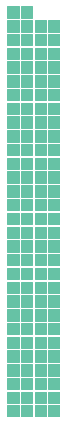

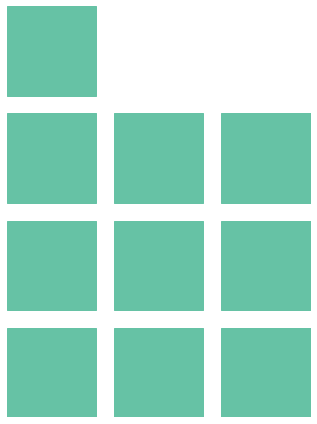

In [16]:
data2 = {'campaign': ['Biden', 'Trump'],
        'donations': [1174, 93]}

df3 = pd.DataFrame(data2)

fig = plt.figure(FigureClass=Waffle,
                 columns=4,
                values=[117.4],
                figsize=(10,6),
                vertical=True,
                rounding_rule='floor')
#fig.savefig("biden_donations.svg")
fig2 = plt.figure(FigureClass=Waffle, 
                 columns=3,
                 values=[9.3],
                 figsize=(10,6),
                 vertical=True,
                 rounding_rule='floor')
#fig2.savefig("trump_donations.svg")

# Group contributions by receipt date for each campaign and visualize!

In [20]:
df_biden = df_biden.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Trump Campaign since 1/1/2019')

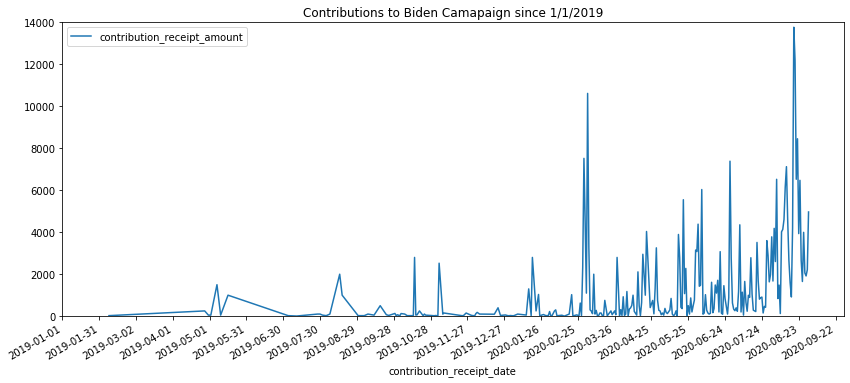

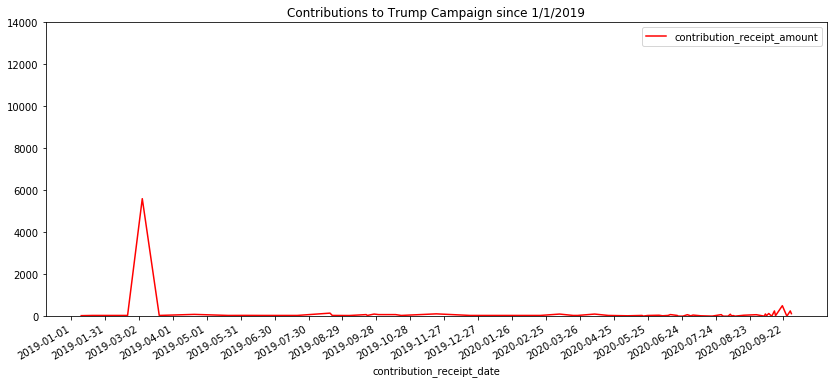

In [22]:
from datetime import datetime, timedelta
t = np.arange(datetime(2019,1,1), datetime(2020,10,1), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_biden.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 14000])
ax1.set_title("Contributions to Biden Camapaign since 1/1/2019")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 14000])
ax2.set_title("Contributions to Trump Campaign since 1/1/2019")

## Collect and visualize top committes by funds raised over 2019-2020

In [23]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,4,ACTBLUE,741986.16
1,30,BIDEN FOR PRESIDENT,321188.12
2,33,BLUE TIDE NY-1 LLC,172000.00
3,27,BERNIE 2020,70965.79
4,83,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,67177.50


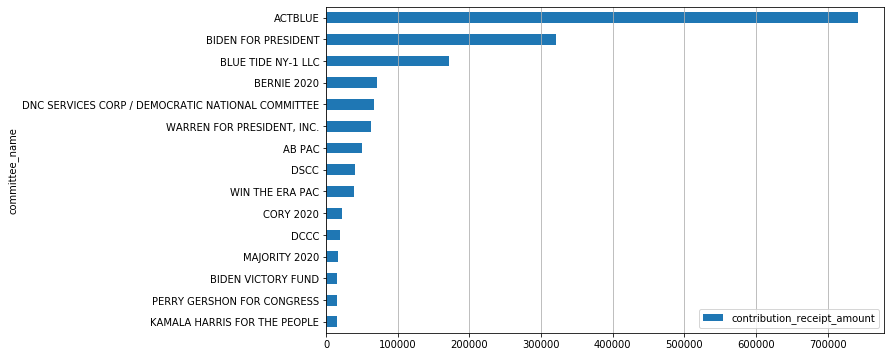

In [24]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.grid(axis='x')
ax3.invert_yaxis()

## Collect and visualize occupation of individual Columbia donors 

In [26]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])

occupations = df_occ["contributor_occupation"].value_counts()

occupations.head(15)

PROFESSOR             518
PHYSICIAN             229
STUDENT               200
GRADUATE STUDENT      134
RESEARCHER            100
SCIENTIST              92
RESEARCH ASSISTANT     83
TEACHER                67
ADMINISTRATOR          61
PHD STUDENT            53
TEACHING ASSISTANT     44
LECTURER               39
LIBRARIAN              33
EDUCATOR               33
RESEARCH SCIENTIST     29
Name: contributor_occupation, dtype: int64

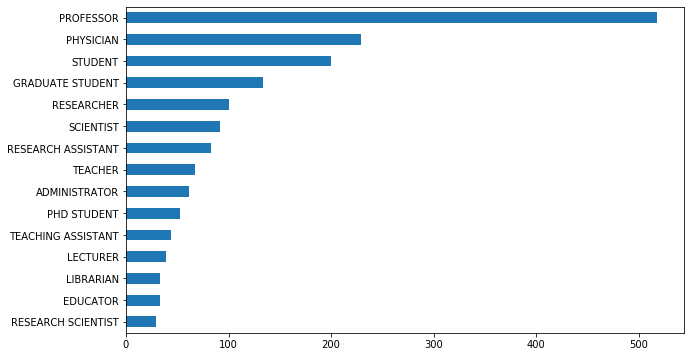

In [29]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()

## Bubble plot for individual Columbia donors

In [30]:
from pprint import pprint as pp
import circlify as circ

[Circle(x=-0.15729648049394496, y=0.8139884458731255, r=0.10983195417177545, level=1, ex={'datum': 29}),
 Circle(x=-0.870422278632682, y=-0.14753994810260418, r=0.11716197441080453, level=1, ex={'datum': 33}),
 Circle(x=-0.6069612671106175, y=0.6410935966406955, r=0.11716197441080453, level=1, ex={'datum': 33}),
 Circle(x=-0.7925837458918644, y=0.34918021345708555, r=0.12736849447099768, level=1, ex={'datum': 39}),
 Circle(x=-0.3562704661440837, y=0.6708358970200716, r=0.1352869949297321, level=1, ex={'datum': 44}),
 Circle(x=-0.6536184268517501, y=-0.31907135784564256, r=0.15929224363529831, level=1, ex={'datum': 61}),
 Circle(x=-0.6911833756597291, y=0.07288875193072875, r=0.16694257700879603, level=1, ex={'datum': 67}),
 Circle(x=-0.40551033625461985, y=-0.5589418184806557, r=0.18580986082801398, level=1, ex={'datum': 83}),
 Circle(x=-0.4697717989569986, y=0.3599983535921652, r=0.19562467146268064, level=1, ex={'datum': 92}),
 Circle(x=0.4820814860302539, y=0.5752402372289579, r=0.2

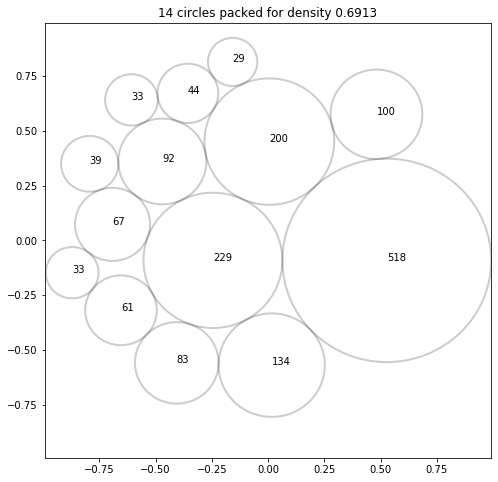

In [31]:
circles2 = circ.circlify([occupations[0], 
                          occupations[1], 
                          occupations[2],
                          occupations[3],
                          occupations[4],
                          occupations[5],
                          occupations[6],
                          occupations[7],
                          occupations[8],
                          occupations[10],
                          occupations[11],
                         occupations[12],
                         occupations[13],
                         occupations[14]],
                         show_enclosure=False)
pp(circles2)
circ.bubbles(circles2)